In [208]:
import maxent as me
import jax.numpy as jnp
from jax import grad, jit, vmap, jacfwd, jacrev
from jax import random
import jax.scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import networkx as nx
import pandas as pd
from tqdm.auto import tqdm, trange
from scipy.sparse import csc_matrix

import observables as obs
import imp
imp.reload(obs)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import imp
imp.reload(me)

<module 'maxent' from '/Users/reema/Postdoc/Progetti/MAXENT/MAXENT/maxent.py'>

In [192]:

N = 1000
ba = nx.barabasi_albert_graph(N,30)
gn = nx.scale_free_graph(1000)
g = ba
adj = np.asarray(nx.adj_matrix(g).todense())
gn_adj = np.asarray(nx.adj_matrix(gn).todense())
d = np.array(adj.sum(axis=0)).flatten()
dinv = 1/d

din = np.array(np.asarray(nx.adj_matrix(gn).todense()).sum(axis=0)).flatten()
dout = np.array(np.asarray(nx.adj_matrix(gn).todense()).sum(axis=1)).flatten()

def get_din_dout(g):
    adj = np.asarray(nx.adj_matrix(g).todense())
    din = np.array(adj.sum(axis=0)).flatten()
    dout = np.array(adj.sum(axis=1)).flatten()
    return din,dout



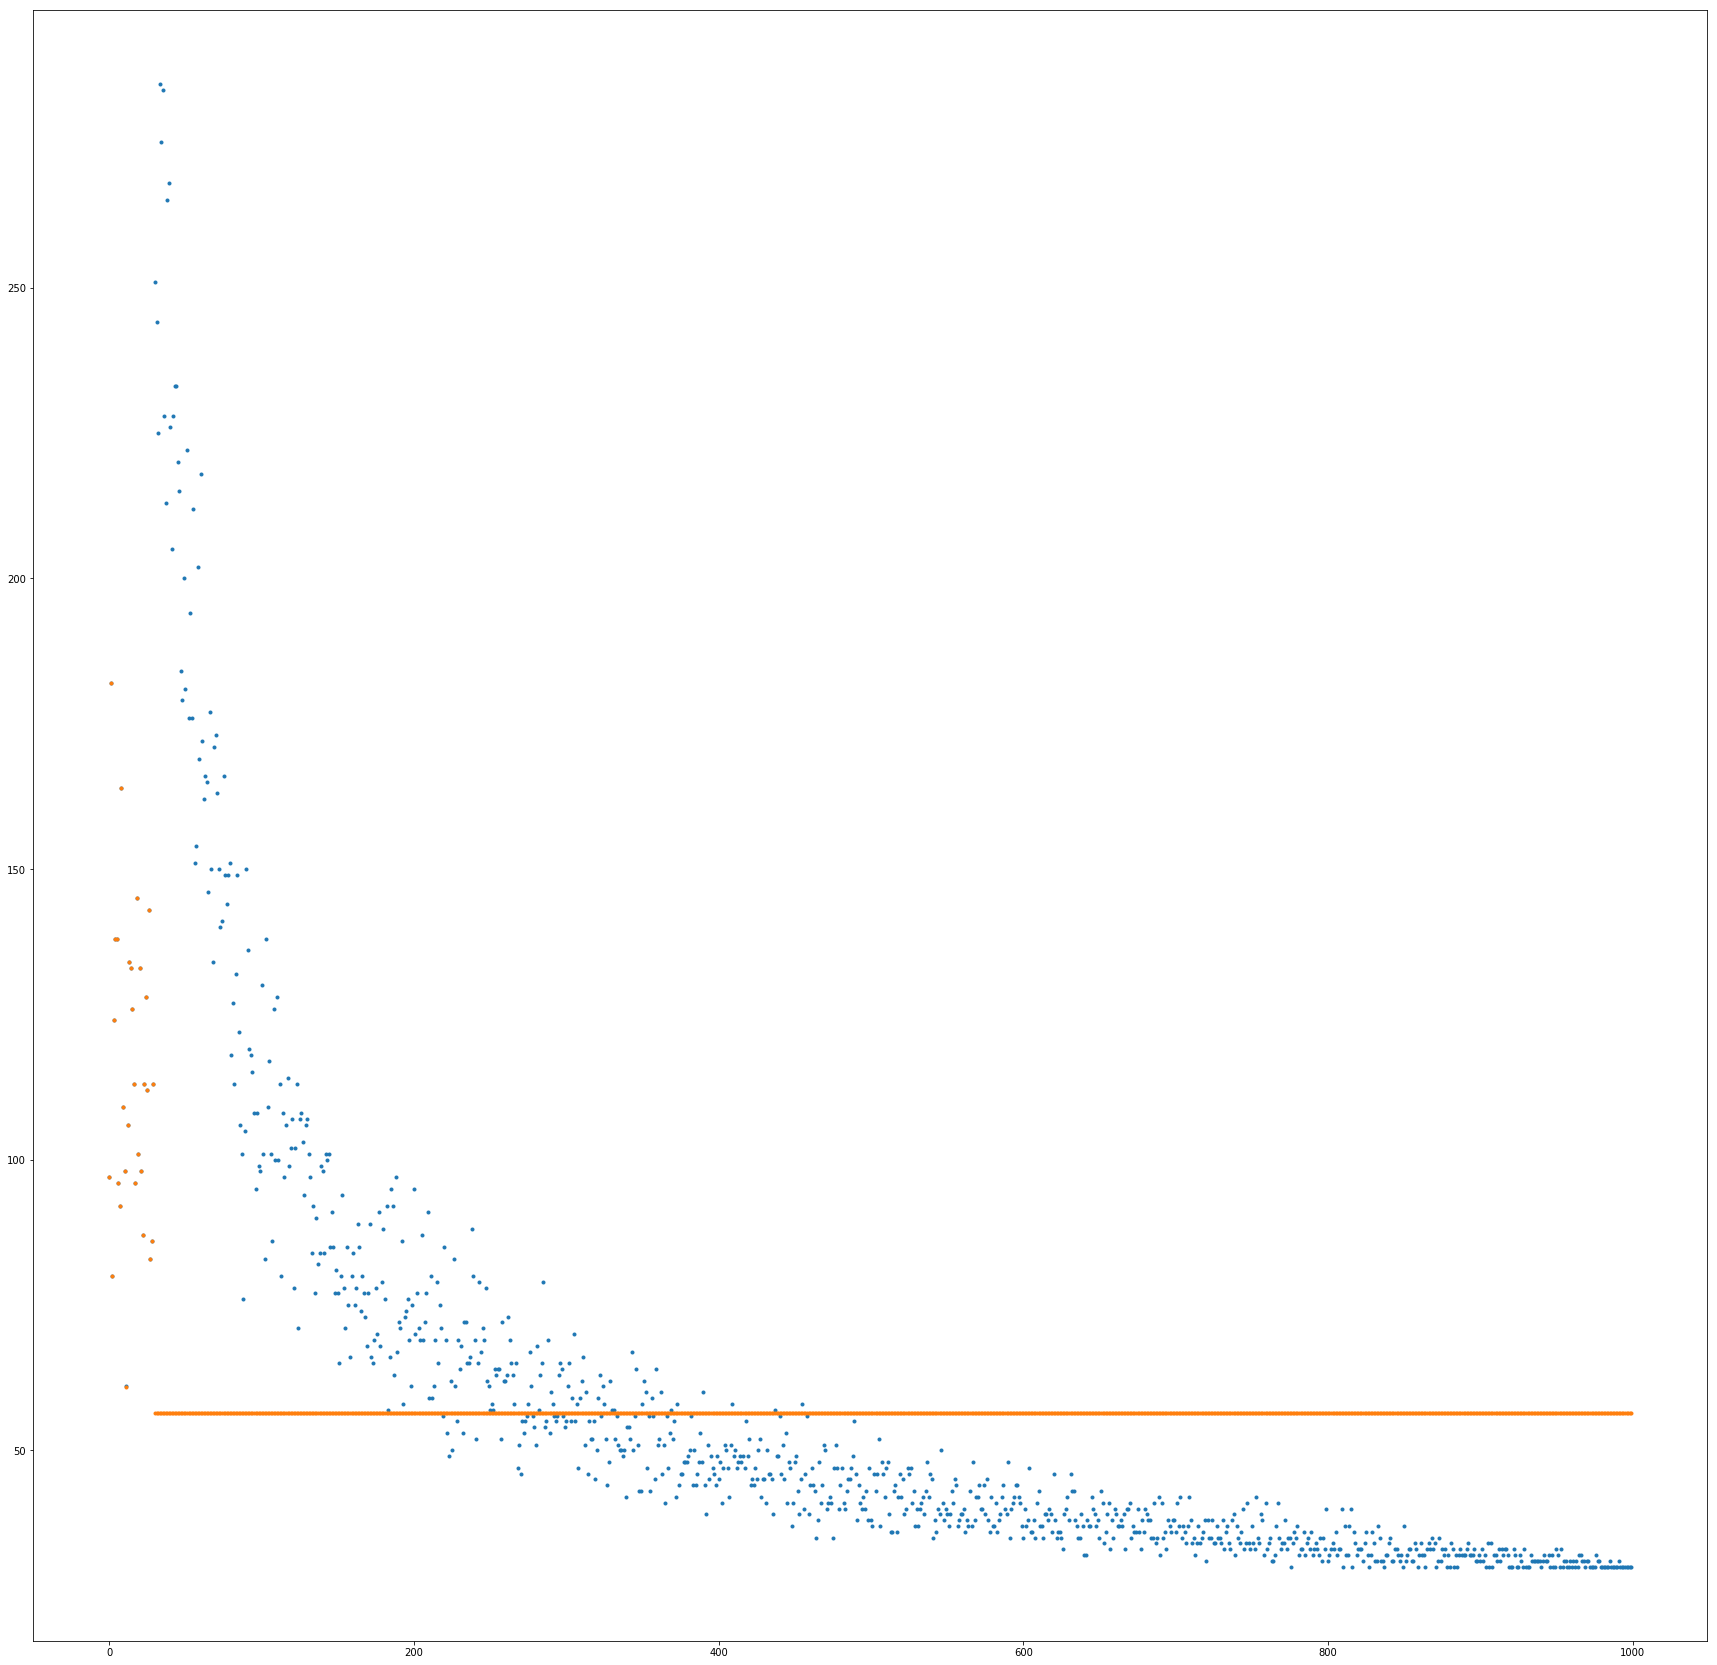

In [85]:
plt.figure(figsize=[30,30])
plt.plot(d,'.')
plt.plot(m.adj_matrix.sum(axis=1),'.')

In [167]:
from scipy import optimize as opt

In [168]:
opt.show_options()




minimize


bfgs
====

Minimization of scalar function of one or more variables using the
BFGS algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
maxiter : int
    Maximum number of iterations to perform.
gtol : float
    Gradient norm must be less than `gtol` before successful
    termination.
norm : float
    Order of norm (Inf is max, -Inf is min).
eps : float or ndarray
    If `jac is None` the absolute step size used for numerical
    approximation of the jacobian via forward differences.
return_all : bool, optional
    Set to True to return a list of the best solution at each of the
    iterations.
finite_diff_rel_step : None or array_like, optional
    If `jac in ['2-point', '3-point', 'cs']` the relative step size to
    use for numerical approximation of the jacobian. The absolute step
    size is computed as ``h = rel_step * sign(x0) * max(1, abs(x0))``,
    possibly adjusted to fit into the bounds. For ``method='3-point'``
    the sign o

In [207]:
imp.reload(me)
imp.reload(obs)
totconn = me.Connectivity(d.sum()/2)
conn1 = me.Connectivity(7, nodeset1=np.arange(5))
conn2 = me.Connectivity(4, nodeset1=np.arange(3,10))
conn3 = me.Connectivity(4, nodeset1=np.arange(4,10))
pwconn = me.Connectivity(50, nodeset1=np.arange(30), nodeset2=np.arange(40,50))
degpart = me.DegreeSequence(d[:30],nodeset=np.arange(30))
outdegpart = me.OutDegreeSequence(dout[:30],nodeset=np.arange(30))
m = me.GraphEnsemble(1000,self_loops=True,directed=True)
#m.fix_edges_value([[3,4],[3,5],[3,6],[4,5]],0)
m.fit([outdegpart,conn1])

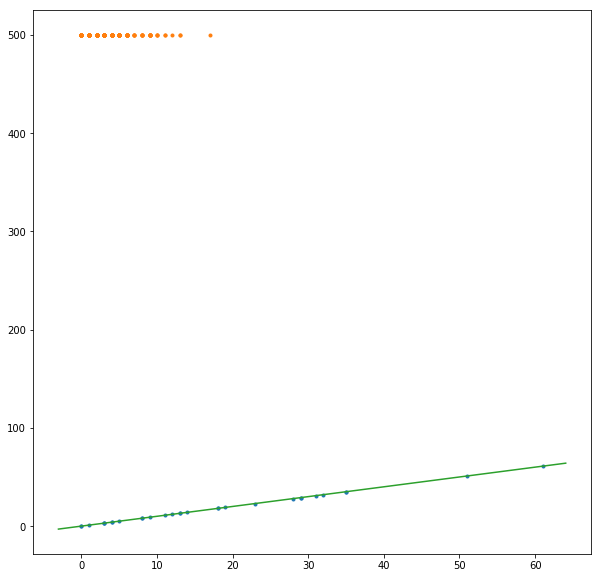

In [204]:
plt.figure(figsize=[10,10])
plt.plot(dout[:30],m.adj_matrix.sum(axis=1)[:30],'.')
plt.plot(dout[30:],m.adj_matrix.sum(axis=1)[30:], '.')
plt.plot(plt.xlim(),plt.xlim())

(100, 0)

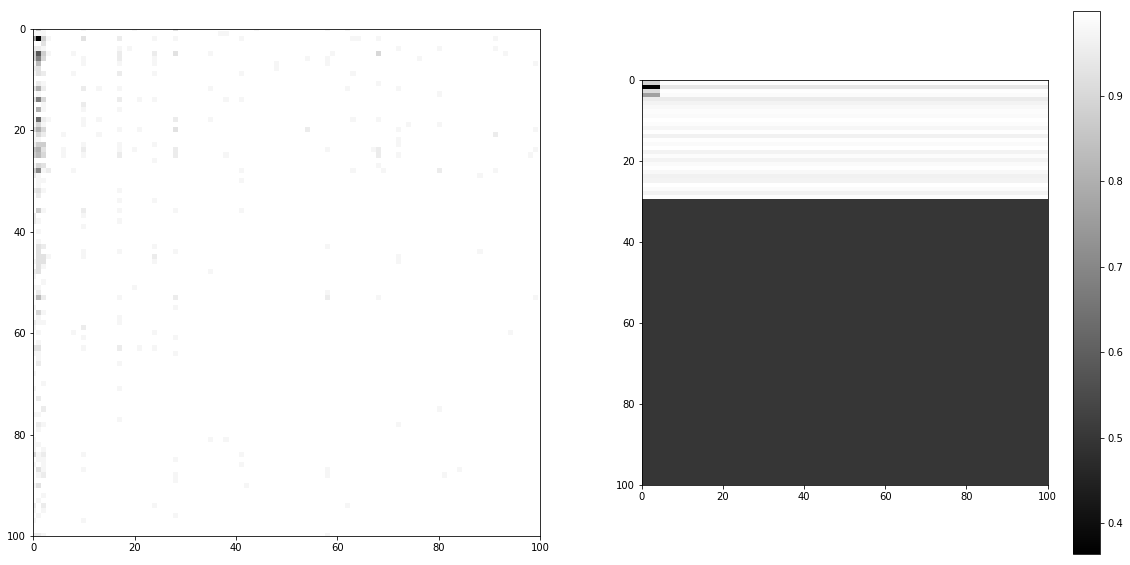

In [205]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(1-gn_adj,cmap='gray')
plt.xlim([0,100])
plt.ylim([100,0])
plt.subplot(1,2,2)
plt.imshow(1-m.adj_matrix,cmap='gray')
plt.colorbar()
plt.xlim([0,100])
plt.ylim([100,0])

In [90]:
pd.DataFrame(m.adj_matrix[:30,30:50])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
3,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
6,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
7,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
8,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
9,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [105]:
a = np.ones([10,2])
b = np.ones([10])*2
np.concatenate([a,b[:,None]],axis=1)

array([[1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.]])

In [97]:
m.adj_matrix[3:10,3:10].sum()

8.0

In [99]:
m.adj_matrix[:30,40:50].sum()

50.0

(array([ 5., 11.,  0., 12.,  0., 29., 26.,  0., 15.,  2.]),
 array([ 8. ,  9.2, 10.4, 11.6, 12.8, 14. , 15.2, 16.4, 17.6, 18.8, 20. ]),
 <a list of 10 Patch objects>)

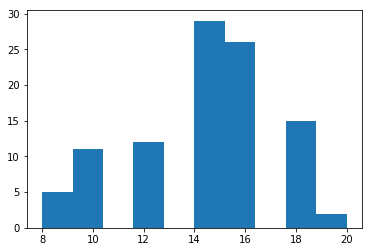

In [94]:
plt.hist([m.sample()[:5,:5].sum() for i in trange(100)])

(array([ 1.,  2.,  5.,  9., 10., 18., 21., 17.,  7., 10.]),
 array([32. , 35.2, 38.4, 41.6, 44.8, 48. , 51.2, 54.4, 57.6, 60.8, 64. ]),
 <a list of 10 Patch objects>)

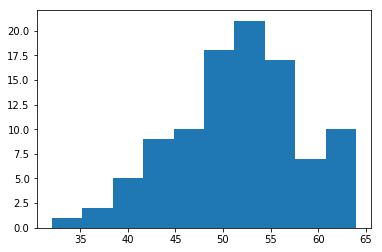

In [98]:
plt.hist([m.sample()[:30,40:50].sum() for i in trange(100)])

In [ ]:
plt.hist([m.sample()[:30,40:50].sum() for i in trange(100)])